<a href="https://colab.research.google.com/github/Preeti-Yadav-CS1/computers/blob/main/Computers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# read data from csv file in pandas format 
computers = pd.read_csv("/content/computers.csv") 
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


Text(0, 0.5, 'Minutes')

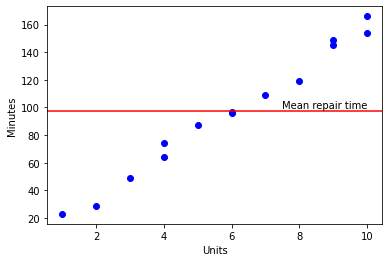

In [7]:
# Mean.
mean_value = computers['Minutes'].mean()
# Actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean value
plt.axhline(y=mean_value,c="r")
# Adding annotation and labels.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

Text(0, 0.5, 'Minutes')

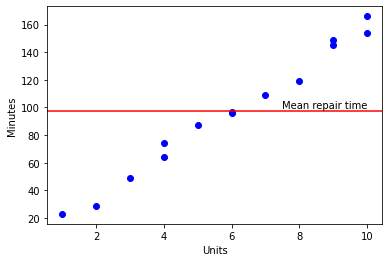

In [17]:
# Plotting the actual time taken for various values of number of faulty units.
plt.scatter(computers['Units'],computers['Minutes'],color='blue', marker='o')
# Plotting the mean
plt.axhline(y=mean_value,c="r")
# Adding annotation, xlabel and ylabel.
plt.annotate("Mean repair time",xy = (7.5,mean_value+2))
plt.xlabel("Units")
plt.ylabel("Minutes")

In [18]:
# time taken to repair is constant, expected time is predicted using mean.
model0 = computers['Minutes'].mean()
#ß0 = 10, startup time required to understand repair work to be done on a given computer. 
#ß1 = 12, time required to replace a single unit of computer.
#takes into account the initial time along with the replacement time that every single component consume.
model1 = 10 + 12*computers['Units']
# ß0 = 6, ß1= 18
model2 = 6 + 18*computers['Units']

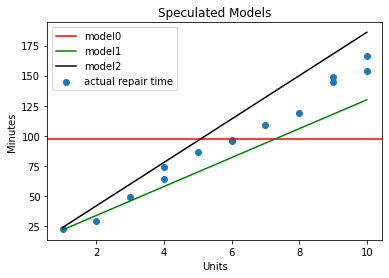

In [23]:
fig,ax = plt.subplots()
# actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')
# Model0 predictions
ax.axhline(y=model0,color="red",label='model0')
# Model1 predictions
ax.plot(computers['Units'],model1,color="green",label='model1')
# Model2 predictions
ax.plot(computers['Units'],model2,color="black",label='model2')
# Adding labels, title and legend
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

In [33]:
# Validating Model0: Estimated time = mean('Minutes')
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model0, error in prediction by Model0.
model0_res = pd.DataFrame({"Units":computers['Units'], "Actual time":computers['Minutes'], "Predicted time":model0,
              "Error":(model0 - computers['Minutes'])})
model0_res # Printing the DataFrame

,Units,Actual time,Predicted time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [34]:
# error in prediction by Model1.
# Model1: Estimated time = 10 + 12*(#Units) minutes
model1_res = pd.DataFrame({"Units":computers['Units'],"Actual time":computers['Minutes'], "Predicted time":model1,
              "Error":(model1 - computers['Minutes'])})
model1_res



,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [35]:
# Model2: Estimated time = 6 + 18*(#Units) minutes
model2_res = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":model2,
              "Error":(model2 - computers['Minutes'])})
model2_res

,Units,Actual time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [36]:
x = computers['Units'] 
y = computers['Minutes']
xiyi = x*y
n = len(computers)
xmean = computers['Units'].mean()
ymean = computers['Minutes'].mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


In [38]:
# Estimating time using the intercept and the coefficient of the best fit model
best_fit_model = c + m*computers['Units']
# Add predicted values to the dataset
computers['best_fit_model'] = best_fit_model
# Print the values predicted by the best fit model
computers[["Units","Minutes","best_fit_model"]]

,Units,Minutes,best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit model line')

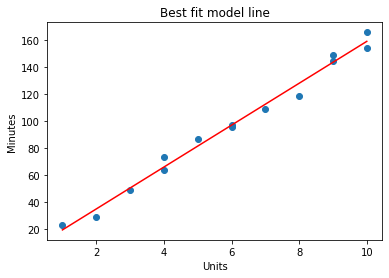

Text(0.5, 1.0, 'Best fit model line')

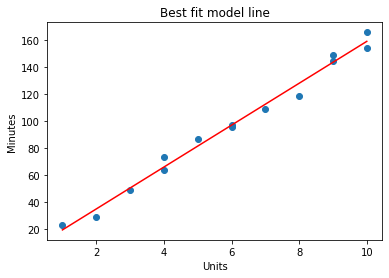

In [40]:
fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=computers) 
# Plotting the target values predicted by the best fit model
ax.plot(computers['Units'],computers['best_fit_model'],color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")